## 👨‍💻 Author: **Muhammad Haweras**

[![LinkedIn](https://img.shields.io/badge/LinkedIn-blue?logo=linkedin&logoColor=white)](https://www.linkedin.com/in/muhammad-haweras-7aa6b11b2/)
[![GitHub](https://img.shields.io/badge/GitHub-100000?logo=github&logoColor=white)](https://github.com/MuhammadHaweras)

<hr style="border:1px solid #ccc">

## Import Libraries

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from skimage.feature import graycomatrix, graycoprops, local_binary_pattern
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from skimage.measure import shannon_entropy
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


## Extracting First Order Statistical Features on 3000 images per class

In [5]:
dataset_path = r'E:\MS CS\1st Semester\Azheimer Classification\data_3k'


# Folder names and their corresponding labels
label_map = {
    'MildDemented': 0,
    'ModerateDemented': 1,
    'NonDemented': 2,
    'VeryMildDemented': 3
}

data = []

for folder_name, label in label_map.items():
    folder_path = os.path.join(dataset_path, folder_name)
    if not os.path.isdir(folder_path):
        print(f"Folder {folder_path} does not exist.")
        continue

    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        
        # Read the image in grayscale
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Failed to load image: {image_path}")
            continue

        # Extract first-order statistical features
        mean_val = np.mean(image)
        variance_val = np.var(image)
        std_val = np.std(image)
        median_val = np.median(image.flatten())
        skewness_val = skew(image.flatten())
        kurtosis_val = kurtosis(image.flatten())
        mean_abs_dev = np.mean(np.abs(image - mean_val))
        med_abs_dev = np.median(np.abs(image.flatten() - np.median(image.flatten())))

        data.append([mean_val, variance_val, std_val, median_val, skewness_val, kurtosis_val, mean_abs_dev, med_abs_dev, label])

columns = ['Mean','Variance', 'Standard Deviation', 'Median', 'Skewness', 'Kurtosis', 'Mean Absolute Deviation', 'Median Absolute Deviation', 'Label']
data_df = pd.DataFrame(data, columns=columns)
data_df.to_excel('first_order_3k.xlsx', index=False)


In [6]:
df = pd.read_excel('first_order_3k.xlsx')
df


,Mean,Variance,Standard Deviation,Median,Skewness,Kurtosis,Mean Absolute Deviation,Median Absolute Deviation,Label
0,54.735312,3633.826684,60.281230,11.0,0.873167,-0.765078,52.978060,6.0,0
1,73.443658,7076.344960,84.121014,32.0,0.608130,-1.227216,76.136920,32.0,0
2,78.717534,6761.413497,82.227815,42.0,0.471930,-1.368202,75.087423,42.0,0
3,74.248505,5895.017267,76.779016,49.0,0.513827,-1.248036,69.285903,47.0,0
4,68.004624,6279.365372,79.242447,27.0,0.728197,-1.014478,70.242814,26.0,0
...,...,...,...,...,...,...,...,...,...
11995,77.163584,7738.793553,87.970413,30.0,0.616524,-1.187401,79.524897,30.0,3
11996,130.266841,7322.002556,85.568701,91.0,0.340658,-1.632219,80.483134,41.0,3
11997,87.731266,10043.232230,100.215928,4.0,0.548918,-1.395056,92.621562,2.0,3
11998,74.200275,7064.924036,84.053102,34.0,0.596799,-1.240492,76.040888,34.0,3


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Mean                       12000 non-null  float64
 1   Variance                   12000 non-null  float64
 2   Standard Deviation         12000 non-null  float64
 3   Median                     12000 non-null  float64
 4   Skewness                   12000 non-null  float64
 5   Kurtosis                   12000 non-null  float64
 6   Mean Absolute Deviation    12000 non-null  float64
 7   Median Absolute Deviation  12000 non-null  float64
 8   Label                      12000 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


* Checking for missing Values

In [12]:
df.isnull().sum()

Mean                         0
Variance                     0
Standard Deviation           0
Median                       0
Skewness                     0
Kurtosis                     0
Mean Absolute Deviation      0
Median Absolute Deviation    0
Label                        0
dtype: int64

### Checking correlation of columns wrt to `Label` column

In [7]:
correlation_with_label = df.corr()['Label'].sort_values(ascending=False)
print(correlation_with_label)

Label                        1.000000
Mean Absolute Deviation      0.168005
Variance                     0.147521
Median Absolute Deviation    0.146731
Standard Deviation           0.141836
Mean                         0.108989
Median                       0.093679
Kurtosis                    -0.276172
Skewness                    -0.280345
Name: Label, dtype: float64


* As mean and median have comparetively very low correlation, so we can drop these.

In [8]:
X = df.drop(columns=['Mean', 'Median', 'Label'])  # Features
y = df['Label']  # Labels

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***ML models which we will use for multi-class classification:***
1. Logistic Regression
2. KNN
3. SVM
4. Decision Tree
5. Random Forest
6. XGboost
7. GradientBoost
8. AdaBoost

In [20]:
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(eval_metric='logloss', random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
]


In [22]:
best_model = None
best_accuracy = 0.0

for name, model in models:
    pipeline = Pipeline([
        ('model', model)
    ])

    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

    mean_accuracy = scores.mean()

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Model {name}")
    print(f"Cross Validation Accuracy: {mean_accuracy:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

print(f"Best Model: {best_model.named_steps['model'].__class__.__name__}")
print(f"Best Test Accuracy: {best_accuracy:.4f}")

c:\ProgramData\miniconda3\envs\ml_ai\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\miniconda3\envs\ml_ai\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

Model Logistic Regression
Cross Validation Accuracy: 0.3178
Test Accuracy: 0.3063
Model KNN
Cross Validation Accuracy: 0.3328
Test Accuracy: 0.3396
Model SVM
Cross Validation Accuracy: 0.3229
Test Accuracy: 0.3113
Model Decision Tree
Cross Validation Accuracy: 0.4147
Test Accuracy: 0.4138
Model Random Forest
Cross Validation Accuracy: 0.4600
Test Accuracy: 0.4508
Model Gradient Boosting
Cross Validation Accuracy: 0.4606
Test Accuracy: 0.4558
Model XG Boost
Cross Validation Accuracy: 0.4694
Test Accuracy: 0.4783
Model AdaBoost
Cross Validation Accuracy: 0.3957
Test Accuracy: 0.3654
Best Model: XGBClassifier
Best Test Accuracy: 0.4783


## 2nd Order Features on 3000 images

In [23]:
dataset_path = r'E:\MS CS\1st Semester\Azheimer Classification\data_3k'


# Folder names and their corresponding labels
label_map = {
    'MildDemented': 0,
    'ModerateDemented': 1,
    'NonDemented': 2,
    'VeryMildDemented': 3
}

data = []

for folder_name, label in label_map.items():
    folder_path = os.path.join(dataset_path, folder_name)
    if not os.path.isdir(folder_path):
        print(f"Folder {folder_path} does not exist.")
        continue

    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        
        # Read the image in grayscale
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Failed to load image: {image_path}")
            continue

        
        # Exrtract 2nd order statistical features
        
        glcm = graycomatrix(image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
        energy = graycoprops(glcm, 'energy')[0, 0]
        contrast = graycoprops(glcm, 'contrast')[0, 0]
        correlation = graycoprops(glcm, 'correlation')[0, 0]
        entropy = shannon_entropy(image)
        idm = graycoprops(glcm, 'homogeneity')[0, 0]
        lbp = local_binary_pattern(image, P=8, R=1, method='uniform')
        lbp_variance = np.var(lbp)

        data.append([energy, contrast, correlation, entropy, idm, lbp_variance, label])
        columns = ['Energy', 'Contrast', 'Correlation', 'Entropy', 'Idm', 'LBP', 'Label']

data_2 = pd.DataFrame(data, columns=columns)
data_2.to_excel('2nd_order_3k.xlsx', index=False)


In [24]:
df_2= pd.read_excel('2nd_order_3k.xlsx')
df_2

,Energy,Contrast,Correlation,Entropy,Idm,LBP,Label
0,0.437017,82.273022,0.988698,5.034992,0.534491,5.169138,0
1,0.414765,110.022622,0.992234,5.374151,0.509873,5.066014,0
2,0.327683,101.102298,0.992526,5.926965,0.454019,5.178979,0
3,0.354867,101.480461,0.991397,5.761734,0.465366,4.914845,0
4,0.416462,109.508768,0.991291,5.337370,0.506473,5.264572,0
...,...,...,...,...,...,...,...
11995,0.422357,137.657511,0.991115,5.398061,0.499847,5.179783,3
11996,0.405089,77.368193,0.994719,4.808894,0.578766,4.996486,3
11997,0.439179,115.904548,0.994237,4.919176,0.565840,5.036503,3
11998,0.405123,106.182095,0.992493,5.454200,0.501897,5.080425,3


In [27]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Energy       12000 non-null  float64
 1   Contrast     12000 non-null  float64
 2   Correlation  12000 non-null  float64
 3   Entropy      12000 non-null  float64
 4   Idm          12000 non-null  float64
 5   LBP          12000 non-null  float64
 6   Label        12000 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 656.4 KB


* Checking for missing values

In [28]:
df_2.isnull().sum()

Energy         0
Contrast       0
Correlation    0
Entropy        0
Idm            0
LBP            0
Label          0
dtype: int64

### Checking correlation of columns wrt to `Label` column

In [29]:
correlation_with_label = df_2.corr()['Label'].sort_values(ascending=False)
print(correlation_with_label)

Label          1.000000
Correlation    0.239767
LBP            0.153052
Entropy        0.108240
Contrast      -0.050624
Idm           -0.098459
Energy        -0.128643
Name: Label, dtype: float64


* As `Contrast` column has comaparitively low correlation with `Label` column, so we can drop it

In [32]:
X2= df_2.drop(columns=['Label'])  # Features
y2= df_2['Label']  # Labels

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [33]:
best_model = None
best_accuracy = 0.0

for name, model in models:
    pipeline = Pipeline([
        ('model', model)
    ])

    scores = cross_val_score(pipeline, X_2_train, y_2_train, cv=5, scoring='accuracy')

    mean_accuracy = scores.mean()

    pipeline.fit(X_2_train, y_2_train)

    y2_pred = pipeline.predict(X_2_test)

    accuracy = accuracy_score(y_2_test, y2_pred)

    print(f"Model {name}")
    print(f"Cross Validation Accuracy: {mean_accuracy:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

print(f"Best Model: {best_model.named_steps['model'].__class__.__name__}")
print(f"Best Test Accuracy: {best_accuracy:.4f}")

c:\ProgramData\miniconda3\envs\ml_ai\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\miniconda3\envs\ml_ai\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

Model Logistic Regression
Cross Validation Accuracy: 0.3647
Test Accuracy: 0.3613
Model KNN
Cross Validation Accuracy: 0.3367
Test Accuracy: 0.3458
Model SVM
Cross Validation Accuracy: 0.2821
Test Accuracy: 0.2679
Model Decision Tree
Cross Validation Accuracy: 0.4171
Test Accuracy: 0.4204
Model Random Forest
Cross Validation Accuracy: 0.4830
Test Accuracy: 0.4908
Model Gradient Boosting
Cross Validation Accuracy: 0.4591
Test Accuracy: 0.4625
Model XG Boost
Cross Validation Accuracy: 0.4771
Test Accuracy: 0.4942
Model AdaBoost
Cross Validation Accuracy: 0.4150
Test Accuracy: 0.4158
Best Model: XGBClassifier
Best Test Accuracy: 0.4942


## Combining First and Second Order Features

In [34]:
# Read the first-order and second-order feature files
first_order_df = pd.read_excel('first_order_3k.xlsx')
second_order_df = pd.read_excel('2nd_order_3k.xlsx')

# Combine the two dataframes on the 'Label' column
combined_df = pd.concat([first_order_df.drop(columns=['Label']), second_order_df], axis=1)

# Save the combined dataframe to a new Excel file
combined_df.to_excel('combined_features_3k.xlsx', index=False)

In [61]:
combined_df = pd.read_excel('combined_features_3k.xlsx')
combined_df

,Mean,Variance,Standard Deviation,Median,Skewness,Kurtosis,Mean Absolute Deviation,Median Absolute Deviation,Energy,Contrast,Correlation,Entropy,Idm,LBP,Label
0,54.735312,3633.826684,60.281230,11.0,0.873167,-0.765078,52.978060,6.0,0.437017,82.273022,0.988698,5.034992,0.534491,5.169138,0
1,73.443658,7076.344960,84.121014,32.0,0.608130,-1.227216,76.136920,32.0,0.414765,110.022622,0.992234,5.374151,0.509873,5.066014,0
2,78.717534,6761.413497,82.227815,42.0,0.471930,-1.368202,75.087423,42.0,0.327683,101.102298,0.992526,5.926965,0.454019,5.178979,0
3,74.248505,5895.017267,76.779016,49.0,0.513827,-1.248036,69.285903,47.0,0.354867,101.480461,0.991397,5.761734,0.465366,4.914845,0
4,68.004624,6279.365372,79.242447,27.0,0.728197,-1.014478,70.242814,26.0,0.416462,109.508768,0.991291,5.337370,0.506473,5.264572,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,77.163584,7738.793553,87.970413,30.0,0.616524,-1.187401,79.524897,30.0,0.422357,137.657511,0.991115,5.398061,0.499847,5.179783,3
11996,130.266841,7322.002556,85.568701,91.0,0.340658,-1.632219,80.483134,41.0,0.405089,77.368193,0.994719,4.808894,0.578766,4.996486,3
11997,87.731266,10043.232230,100.215928,4.0,0.548918,-1.395056,92.621562,2.0,0.439179,115.904548,0.994237,4.919176,0.565840,5.036503,3
11998,74.200275,7064.924036,84.053102,34.0,0.596799,-1.240492,76.040888,34.0,0.405123,106.182095,0.992493,5.454200,0.501897,5.080425,3


In [62]:
correlation_with_label = combined_df.corr()['Label'].sort_values(ascending=False)
print(correlation_with_label)

Label                        1.000000
Correlation                  0.239767
Mean Absolute Deviation      0.168005
LBP                          0.153052
Variance                     0.147521
Median Absolute Deviation    0.146731
Standard Deviation           0.141836
Mean                         0.108989
Entropy                      0.108240
Median                       0.093679
Contrast                    -0.050624
Idm                         -0.098459
Energy                      -0.128643
Kurtosis                    -0.276172
Skewness                    -0.280345
Name: Label, dtype: float64


In [63]:
X = combined_df.drop(columns=['Contrast' ,'Label'])  # Features
y = combined_df['Label']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
best_model = None
best_accuracy = 0.0

for name, model in models:
    pipeline = Pipeline([
        ('model', model)
    ])

    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

    mean_accuracy = scores.mean()

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Model {name}")
    print(f"Cross Validation Accuracy: {mean_accuracy:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

print(f"Best Model: {best_model.named_steps['model'].__class__.__name__}")
print(f"Best Test Accuracy: {best_accuracy:.4f}")

c:\ProgramData\miniconda3\envs\ml_ai\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\miniconda3\envs\ml_ai\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

Model Logistic Regression
Cross Validation Accuracy: 0.3168
Test Accuracy: 0.3271
Model KNN
Cross Validation Accuracy: 0.3372
Test Accuracy: 0.3442
Model SVM
Cross Validation Accuracy: 0.3220
Test Accuracy: 0.3121
Model Decision Tree
Cross Validation Accuracy: 0.4655
Test Accuracy: 0.4800
Model Random Forest
Cross Validation Accuracy: 0.5616
Test Accuracy: 0.5758
Model Gradient Boosting
Cross Validation Accuracy: 0.5128
Test Accuracy: 0.5363
Model XG Boost
Cross Validation Accuracy: 0.5565
Test Accuracy: 0.5579
Model AdaBoost
Cross Validation Accuracy: 0.4178
Test Accuracy: 0.4213
Best Model: RandomForestClassifier
Best Test Accuracy: 0.5758


RandomForest Accuracy: 0.5758


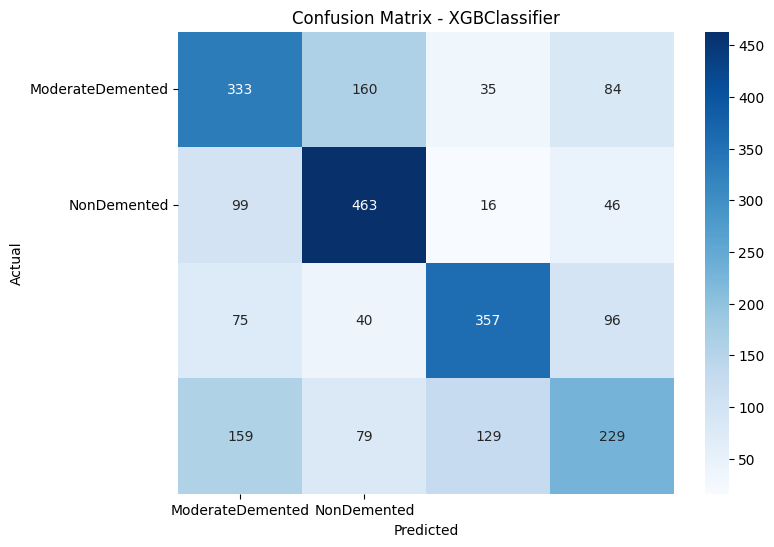


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.54      0.52       612
           1       0.62      0.74      0.68       624
           2       0.66      0.63      0.65       568
           3       0.50      0.38      0.44       596

    accuracy                           0.58      2400
   macro avg       0.57      0.57      0.57      2400
weighted avg       0.57      0.58      0.57      2400



In [66]:
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"RandomForest Accuracy: {accuracy:.4f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
			 xticklabels=['ModerateDemented', 'NonDemented'], 
			 yticklabels=['ModerateDemented', 'NonDemented'])
plt.title('Confusion Matrix - XGBClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

## Now extracting features only for Moderate and Non Dementiated
---

## First Order Features

In [39]:
dataset_path = r'E:\MS CS\1st Semester\Azheimer Classification\two_classes_3k'


# Folder names and their corresponding labels
label_map = {
    'ModerateDemented': 0,
    'NonDemented': 1,
}

data = []

for folder_name, label in label_map.items():
    folder_path = os.path.join(dataset_path, folder_name)
    if not os.path.isdir(folder_path):
        print(f"Folder {folder_path} does not exist.")
        continue

    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        
        # Read the image in grayscale
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Failed to load image: {image_path}")
            continue

        # Extract first-order statistical features
        mean_val = np.mean(image)
        variance_val = np.var(image)
        std_val = np.std(image)
        median_val = np.median(image.flatten())
        skewness_val = skew(image.flatten())
        kurtosis_val = kurtosis(image.flatten())
        mean_abs_dev = np.mean(np.abs(image - mean_val))
        med_abs_dev = np.median(np.abs(image.flatten() - np.median(image.flatten())))

        data.append([mean_val, variance_val, std_val, median_val, skewness_val, kurtosis_val, mean_abs_dev, med_abs_dev, label])

columns = ['Mean','Variance', 'Standard Deviation', 'Median', 'Skewness', 'Kurtosis', 'Mean Absolute Deviation', 'Median Absolute Deviation', 'Label']
data_df = pd.DataFrame(data, columns=columns)
data_df.to_excel('two_classes_first_order_3k.xlsx', index=False)


In [40]:
df = pd.read_excel('two_classes_first_order_3k.xlsx')
df

,Mean,Variance,Standard Deviation,Median,Skewness,Kurtosis,Mean Absolute Deviation,Median Absolute Deviation,Label
0,72.950933,7425.848238,86.173362,31.0,0.726425,-1.015362,76.695123,31.0,0
1,82.393893,4392.084684,66.272805,32.0,0.788855,-1.016406,58.791629,4.0,0
2,84.676399,6788.072040,82.389757,71.0,0.357875,-1.395940,74.354088,71.0,0
3,70.483299,6401.592594,80.009953,35.0,0.617048,-1.179041,71.997265,35.0,0
4,68.444814,6330.368447,79.563613,5.0,0.765340,-0.982587,70.974853,1.0,0
...,...,...,...,...,...,...,...,...,...
5995,94.658024,7443.660097,86.276649,103.0,0.127652,-1.581385,79.413149,101.0,1
5996,67.512855,5995.566082,77.431041,31.0,0.658878,-1.090769,69.231177,31.0,1
5997,96.625857,7946.381960,89.142481,107.0,0.149296,-1.571269,81.703401,106.0,1
5998,83.070811,8014.532474,89.523921,44.0,0.405285,-1.478734,83.175332,44.0,1


In [43]:
correlation_with_label = df.corr()['Label'].sort_values(ascending=False)
print(correlation_with_label)

Label                        1.000000
Mean Absolute Deviation      0.309443
Variance                     0.262378
Standard Deviation           0.257641
Median Absolute Deviation    0.254037
Mean                         0.199802
Median                       0.167930
Kurtosis                    -0.496657
Skewness                    -0.507437
Name: Label, dtype: float64


In [44]:
X = df.drop(columns=['Label'])  # Features
y = df['Label']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(eval_metric='logloss', objective='binary:logistic', random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
]


In [48]:
best_model = None
best_accuracy = 0.0

for name, model in models:
    pipeline = Pipeline([
        ('model', model)
    ])

    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

    mean_accuracy = scores.mean()

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Model {name}")
    print(f"Cross Validation Accuracy: {mean_accuracy:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

print(f"Best Model: {best_model.named_steps['model'].__class__.__name__}")
print(f"Best Test Accuracy: {best_accuracy:.4f}")

c:\ProgramData\miniconda3\envs\ml_ai\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\miniconda3\envs\ml_ai\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

Model Logistic Regression
Cross Validation Accuracy: 0.7735
Test Accuracy: 0.7800
Model KNN
Cross Validation Accuracy: 0.6625
Test Accuracy: 0.6350
Model SVM
Cross Validation Accuracy: 0.6467
Test Accuracy: 0.6467
Model Decision Tree
Cross Validation Accuracy: 0.7662
Test Accuracy: 0.7608
Model Random Forest
Cross Validation Accuracy: 0.8194
Test Accuracy: 0.8217
Model Gradient Boosting
Cross Validation Accuracy: 0.8171
Test Accuracy: 0.8075
Model XG Boost
Cross Validation Accuracy: 0.8248
Test Accuracy: 0.8108
Model AdaBoost
Cross Validation Accuracy: 0.7771
Test Accuracy: 0.7642
Best Model: RandomForestClassifier
Best Test Accuracy: 0.8217


## 2nd Order Features

In [49]:
dataset_path = r'E:\MS CS\1st Semester\Azheimer Classification\two_classes_3k'


# Folder names and their corresponding labels
label_map = {
    'ModerateDemented': 0,
    'NonDemented': 1,
}

data = []

for folder_name, label in label_map.items():
    folder_path = os.path.join(dataset_path, folder_name)
    if not os.path.isdir(folder_path):
        print(f"Folder {folder_path} does not exist.")
        continue

    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        
        # Read the image in grayscale
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Failed to load image: {image_path}")
            continue

        
        # Exrtract 2nd order statistical features
        
        glcm = graycomatrix(image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
        energy = graycoprops(glcm, 'energy')[0, 0]
        contrast = graycoprops(glcm, 'contrast')[0, 0]
        correlation = graycoprops(glcm, 'correlation')[0, 0]
        entropy = shannon_entropy(image)
        idm = graycoprops(glcm, 'homogeneity')[0, 0]
        lbp = local_binary_pattern(image, P=8, R=1, method='uniform')
        lbp_variance = np.var(lbp)

        data.append([energy, contrast, correlation, entropy, idm, lbp_variance, label])
        columns = ['Energy', 'Contrast', 'Correlation', 'Entropy', 'Idm', 'LBP', 'Label']

data_df = pd.DataFrame(data, columns=columns)
data_df.to_excel('two_classes_2nd_order_3k.xlsx', index=False)


In [50]:
df = pd.read_excel('two_classes_2nd_order_3k.xlsx')
df

,Energy,Contrast,Correlation,Entropy,Idm,LBP,Label
0,0.431744,138.978099,0.990654,5.314018,0.509669,5.215329,0
1,0.438719,59.282511,0.993262,4.748322,0.593685,4.910794,0
2,0.308876,98.766176,0.992723,6.096612,0.426652,4.964118,0
3,0.409382,100.309978,0.992173,5.403963,0.500029,5.136254,0
4,0.452901,91.523543,0.992782,5.070750,0.542606,4.859707,0
...,...,...,...,...,...,...,...
5995,0.300098,97.652026,0.993434,6.081695,0.427352,5.039618,1
5996,0.408638,113.586443,0.990537,5.393945,0.503930,5.371528,1
5997,0.309994,76.771140,0.995166,5.988073,0.446812,5.154775,1
5998,0.435149,85.010330,0.994700,5.170395,0.527049,5.302010,1


In [51]:
correlation_with_label = df.corr()['Label'].sort_values(ascending=False)
print(correlation_with_label)

Label          1.000000
Correlation    0.461923
LBP            0.287813
Entropy        0.191075
Contrast      -0.131652
Idm           -0.160001
Energy        -0.224543
Name: Label, dtype: float64


In [52]:
X = df.drop(columns=['Label'])  # Features
y = df['Label']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
best_model = None
best_accuracy = 0.0

for name, model in models:
    pipeline = Pipeline([
        ('model', model)
    ])

    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

    mean_accuracy = scores.mean()

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Model {name}")
    print(f"Cross Validation Accuracy: {mean_accuracy:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

print(f"Best Model: {best_model.named_steps['model'].__class__.__name__}")
print(f"Best Test Accuracy: {best_accuracy:.4f}")

c:\ProgramData\miniconda3\envs\ml_ai\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\miniconda3\envs\ml_ai\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

Model Logistic Regression
Cross Validation Accuracy: 0.7158
Test Accuracy: 0.7300
Model KNN
Cross Validation Accuracy: 0.6731
Test Accuracy: 0.6833
Model SVM
Cross Validation Accuracy: 0.5627
Test Accuracy: 0.5417
Model Decision Tree
Cross Validation Accuracy: 0.7744
Test Accuracy: 0.7775
Model Random Forest
Cross Validation Accuracy: 0.8265
Test Accuracy: 0.8242
Model Gradient Boosting
Cross Validation Accuracy: 0.8202
Test Accuracy: 0.8150
Model XG Boost
Cross Validation Accuracy: 0.8187
Test Accuracy: 0.8142
Model AdaBoost
Cross Validation Accuracy: 0.7850
Test Accuracy: 0.7808
Best Model: RandomForestClassifier
Best Test Accuracy: 0.8242


## Combining first and second order features

In [54]:
# Read the first-order and second-order feature files
first_order_df = pd.read_excel('two_classes_first_order_3k.xlsx')
second_order_df = pd.read_excel('two_classes_2nd_order_3k.xlsx')

# Combine the two dataframes on the 'Label' column
combined_df = pd.concat([first_order_df.drop(columns=['Label']), second_order_df], axis=1)

# Save the combined dataframe to a new Excel file
combined_df.to_excel('two_classes_combined_3k.xlsx', index=False)

In [55]:
df = pd.read_excel('two_classes_combined_3k.xlsx')
df

,Mean,Variance,Standard Deviation,Median,Skewness,Kurtosis,Mean Absolute Deviation,Median Absolute Deviation,Energy,Contrast,Correlation,Entropy,Idm,LBP,Label
0,72.950933,7425.848238,86.173362,31.0,0.726425,-1.015362,76.695123,31.0,0.431744,138.978099,0.990654,5.314018,0.509669,5.215329,0
1,82.393893,4392.084684,66.272805,32.0,0.788855,-1.016406,58.791629,4.0,0.438719,59.282511,0.993262,4.748322,0.593685,4.910794,0
2,84.676399,6788.072040,82.389757,71.0,0.357875,-1.395940,74.354088,71.0,0.308876,98.766176,0.992723,6.096612,0.426652,4.964118,0
3,70.483299,6401.592594,80.009953,35.0,0.617048,-1.179041,71.997265,35.0,0.409382,100.309978,0.992173,5.403963,0.500029,5.136254,0
4,68.444814,6330.368447,79.563613,5.0,0.765340,-0.982587,70.974853,1.0,0.452901,91.523543,0.992782,5.070750,0.542606,4.859707,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,94.658024,7443.660097,86.276649,103.0,0.127652,-1.581385,79.413149,101.0,0.300098,97.652026,0.993434,6.081695,0.427352,5.039618,1
5996,67.512855,5995.566082,77.431041,31.0,0.658878,-1.090769,69.231177,31.0,0.408638,113.586443,0.990537,5.393945,0.503930,5.371528,1
5997,96.625857,7946.381960,89.142481,107.0,0.149296,-1.571269,81.703401,106.0,0.309994,76.771140,0.995166,5.988073,0.446812,5.154775,1
5998,83.070811,8014.532474,89.523921,44.0,0.405285,-1.478734,83.175332,44.0,0.435149,85.010330,0.994700,5.170395,0.527049,5.302010,1


In [56]:
correlation_with_label = df.corr()['Label'].sort_values(ascending=False)
print(correlation_with_label)

Label                        1.000000
Correlation                  0.461923
Mean Absolute Deviation      0.309443
LBP                          0.287813
Variance                     0.262378
Standard Deviation           0.257641
Median Absolute Deviation    0.254037
Mean                         0.199802
Entropy                      0.191075
Median                       0.167930
Contrast                    -0.131652
Idm                         -0.160001
Energy                      -0.224543
Kurtosis                    -0.496657
Skewness                    -0.507437
Name: Label, dtype: float64


In [57]:
X = df.drop(columns=['Label'])  # Features
y = df['Label']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
best_model = None
best_accuracy = 0.0

for name, model in models:
    pipeline = Pipeline([
        ('model', model)
    ])

    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

    mean_accuracy = scores.mean()

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Model {name}")
    print(f"Cross Validation Accuracy: {mean_accuracy:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

print(f"Best Model: {best_model.named_steps['model'].__class__.__name__}")
print(f"Best Test Accuracy: {best_accuracy:.4f}")

c:\ProgramData\miniconda3\envs\ml_ai\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\miniconda3\envs\ml_ai\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

Model Logistic Regression
Cross Validation Accuracy: 0.7721
Test Accuracy: 0.7708
Model KNN
Cross Validation Accuracy: 0.6942
Test Accuracy: 0.6667
Model SVM
Cross Validation Accuracy: 0.6479
Test Accuracy: 0.6500
Model Decision Tree
Cross Validation Accuracy: 0.8156
Test Accuracy: 0.8325
Model Random Forest
Cross Validation Accuracy: 0.8688
Test Accuracy: 0.8742
Model Gradient Boosting
Cross Validation Accuracy: 0.8604
Test Accuracy: 0.8692
Model XG Boost
Cross Validation Accuracy: 0.8769
Test Accuracy: 0.8942
Model AdaBoost
Cross Validation Accuracy: 0.8052
Test Accuracy: 0.7967
Best Model: XGBClassifier
Best Test Accuracy: 0.8942


XGBClassifier Accuracy: 0.8942


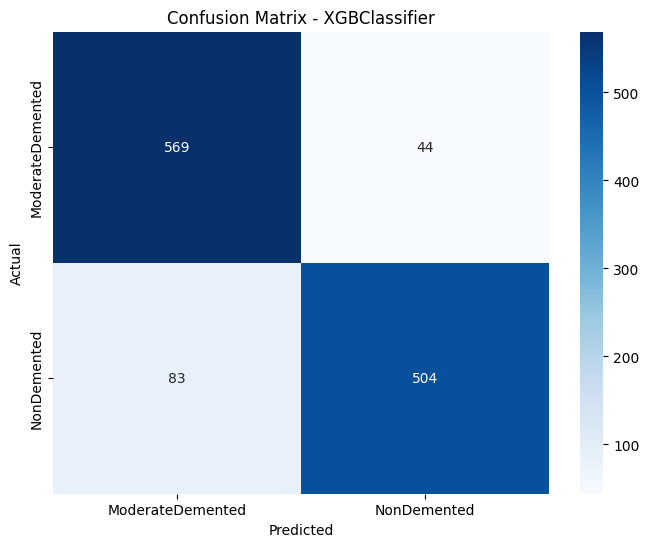


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       613
           1       0.92      0.86      0.89       587

    accuracy                           0.89      1200
   macro avg       0.90      0.89      0.89      1200
weighted avg       0.90      0.89      0.89      1200



In [ ]:
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBClassifier Accuracy: {accuracy:.4f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
			 xticklabels=['ModerateDemented', 'NonDemented'], 
			 yticklabels=['ModerateDemented', 'NonDemented'])
plt.title('Confusion Matrix - XGBClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)